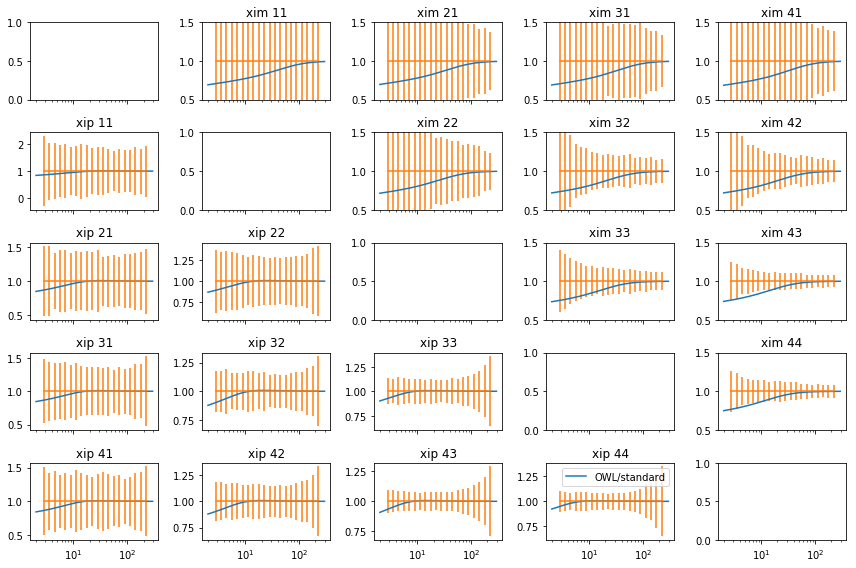

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d



fig, ax = plt.subplots(5,5,sharex=True, figsize=(12,8))
fig.subplots_adjust(wspace=0.2,hspace=0.2)

for i in range(4):
    for j in range(4):
     if i>=j:
        binx = [i,j]
        mute = np.loadtxt('../output_MEAD_wb/shear_xi_plus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        mute_theta = np.loadtxt('shear_xi_plus/theta.txt')*60./((2*math.pi)/360)
        mask = (mute_theta>2) & (mute_theta<300)
        #ax[i+1,j].plot(mute_theta[mask],mute[mask]*mute_theta[mask], label='with OWL')

        mute1 = np.loadtxt('../output_MEAD/shear_xi_plus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        mute_theta = np.loadtxt('shear_xi_plus/theta.txt')*60./((2*math.pi)/360)
        mask = (mute_theta>2) & (mute_theta<300)
        f = interp1d(mute_theta[mask],mute1[mask])

        xi_t = f(meas['Yshear_y1']['1']['theta']*60)

        ax[i+1,j].plot(mute_theta[mask],mute[mask]/mute1[mask], label='OWL/standard')

        theta =meas['Yshear_y1']['1']['theta']*60
        xx = xi_t*theta
        #xx = meas['shearshear_y1']['{0}_{1}'.format(binx[0],binx[1])]['xip']*theta
        err = meas['shearshear_y3']['{0}_{1}'.format(binx[0],binx[1])]['err_p']/xi_t
        ax[i+1,j].errorbar(theta,np.ones(len(xx)),err)
        ax[i+1,j].set_title( 'xip {0}{1}'.format(binx[0]+1,binx[1]+1))

        
        
        
        
        
        binx = [i,j]
        mute = np.loadtxt('../output_MEAD_wb/shear_xi_minus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        mute_theta = np.loadtxt('shear_xi_minus/theta.txt')*60./((2*math.pi)/360)
        mask = (mute_theta>2) & (mute_theta<300)
        #ax[j,i+1].plot(mute_theta[mask],mute[mask]*mute_theta[mask], label='with OWL')

        mute1 = np.loadtxt('../output_MEAD/shear_xi_minus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        mute_theta = np.loadtxt('shear_xi_minus/theta.txt')*60./((2*math.pi)/360)
        mask = (mute_theta>2) & (mute_theta<300)
        f = interp1d(mute_theta[mask],mute1[mask])

        xi_t = f(meas['Yshear_y1']['1']['theta']*60)

        ax[j,i+1].plot(mute_theta[mask],mute[mask]/mute1[mask],  label='OWL/standard')

        theta =meas['Yshear_y1']['1']['theta']*60
        xx = xi_t*theta
        #xx = meas['shearshear_y1']['{0}_{1}'.format(binx[0],binx[1])]['xim']*theta
        
        err = meas['shearshear_y3']['{0}_{1}'.format(binx[0],binx[1])]['err_m']/xi_t
        ax[j,i+1].errorbar(theta,np.ones(len(xx)),err)
        ax[j,i+1].set_ylim([0.5,1.5])
        ax[j,i+1].set_title( 'xim {0}{1}'.format(binx[0]+1,binx[1]+1))

plt.xscale('log')

plt.tight_layout()

ax[4,3].legend()


In [97]:
ax[j,i+1].transAxes

In [72]:
import pickle

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')
    
meas = load_obj('/global/homes/g/giannini/tSZ/results')

In [74]:
meas['shearshear_y1']['{0}_{1}'.format(binx[0],binx[1])].keys()

['err_p', 'cov_p', 'xim', 'xip', 'cov_m', 'err_m', 'theta']

In [28]:
meas['Yshear_y1']['1']['theta']

array([0.04675077, 0.05885573, 0.07409498, 0.09328005, 0.11743262,
       0.14783891, 0.18611816, 0.23430889, 0.29497741, 0.37135456,
       0.46750769, 0.58855731, 0.74094975, 0.93280047, 1.17432622,
       1.47838912, 1.86118163, 2.34308885, 2.9497741 , 3.71354558])

In [37]:
meas['shearshear_y1']['0_0']['err']

array([1.84474164e-05, 1.30969586e-05, 1.09899550e-05, 9.14649426e-06,
       6.13703456e-06, 4.85669819e-06, 4.26907161e-06, 3.31022317e-06,
       2.68225151e-06, 1.96683031e-06, 1.70443875e-06, 1.26607502e-06,
       1.08775583e-06, 6.76064539e-07, 5.86195101e-07, 5.42477734e-07,
       4.21005327e-07, 2.84635485e-07, 2.25517422e-07, 1.75405356e-07])